In [94]:
import pandas as pd
 
wine = pd.read_csv("winequality-red.csv")

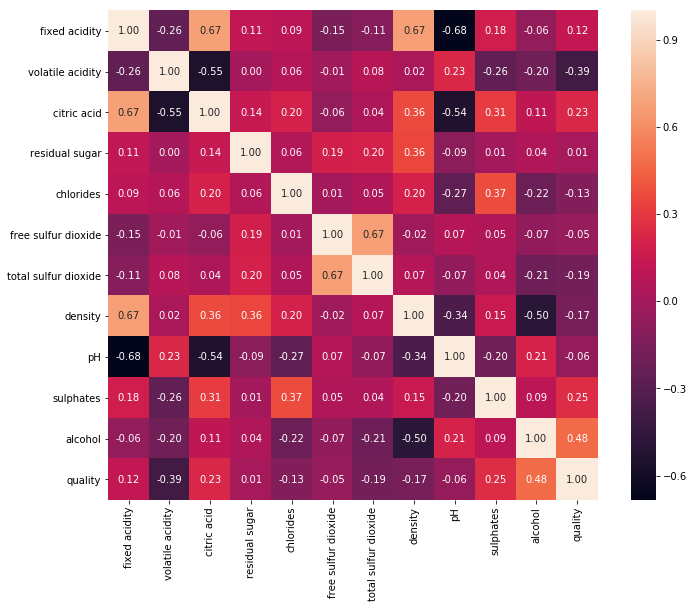

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(wine.corr(), annot=True, square=True, fmt='.2f')
plt.show()
#目的変数に強く相関している変数は特には見られない

In [47]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205
1,-0.045986,0.241219,-0.270976,0.004191,0.017585,0.128522,0.072552,0.003915,-0.087491,0.013085,-0.095844,-0.127205
2,-0.045986,0.159027,-0.230976,-0.016357,0.007568,-0.012323,0.026616,0.018599,-0.040247,-0.004880,-0.095844,-0.127205
3,0.254899,-0.169740,0.289024,-0.043754,-0.020812,0.015846,0.047817,0.092021,-0.118987,-0.046796,-0.095844,0.072795
4,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205


In [48]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

# 説明変数に "density (濃度)" を利用
X = wine2.loc[:, ['fixed acidity','density','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide'
                ,'total sulfur dioxide','pH','sulphates','alcohol']].as_matrix()
 
# 目的変数に "alcohol (アルコール度数)" を利用
y = wine['quality'].as_matrix()

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [56]:
clf.fit(X_train, y_train) #重回帰

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('test : %.3f' % (mse(y_test, clf.predict(X_test)) ** (1/2)))

RMSE
test : 0.633


In [59]:
#多項式回帰
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
from sklearn import preprocessing
from sklearn import ensemble
import pandas as pd

In [61]:
rf = ensemble.RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
print('RMSE')
print('test : %.3f' % (mse(y_test, rf.predict(X_test)) ** (1/2)))

RMSE
test : 0.671


In [63]:
from sklearn.svm import SVR

In [66]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_train)

In [67]:
test_rbf = svr_rbf.predict(X_test)

In [70]:
print('RMSE')
print('test : %.3f' % (mse(y_test, svr_rbf.predict(X_test)) ** (1/2)))

RMSE
test : 0.632


In [103]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X[:, 0:2])

In [104]:
import matplotlib.pyplot as plt
% matplotlib inline

# クラスタリングの結果をプロットする関数
# (クラスタの数, 学習器, 学習データ)
def kmeans_plot(n_clusters, km, X):
    # クラスタの予測値を算出
    y_km = km.fit_predict(X)
    
    # クラスタごとに散布図をプロット
    # 5クラスまでプロットできる
    for i, color, marker in zip(range(n_clusters), 'rgbcm', '>o+xv'):
        plt.scatter(X[y_km==i, 0],            # 横軸の値
                    X[y_km==i, 1],            # 縦軸の値
                    color=color,              # プロットの色
#                     marker=marker,            # プロットの形
                    marker='${}$'.format(y[i]),
                    label='cluster ' + str(i) # ラベル
                   )
    
    # クラスタの中心をプロット
    plt.scatter(km.cluster_centers_[:, 0],    # 横軸の値
                km.cluster_centers_[:, 1],    # 縦軸の値
                color='y',                    # プロットの色
                marker='*',                   # プロットの形
                label='centroids',            # ラベル
                s=300,                        # プロットのサイズを大きくして見やすくする
               )
    
    plt.legend()
    plt.grid()
    plt.show()

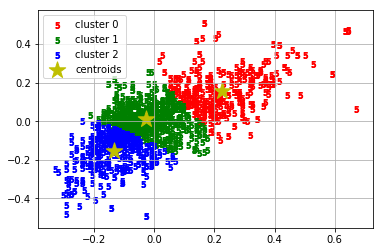

In [106]:
kmeans_plot(3, km, X[:, 0:2])

In [107]:
import numpy as np
np.c_[y,y_km]

array([[5, 1],
       [5, 1],
       [5, 1],
       ...,
       [6, 2],
       [5, 2],
       [6, 2]], dtype=int64)

[5 5 5 ... 6 5 6]
